# Working with Dates & Times data

Using the `datetime` library from python to create datetime objects. This is how the default format (**ISO 8601**) is defined :

**ISO Format**: YYYY-MM-DD

>`date(`_`year`_,_`month`_,_`day`_`)`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import date
from datetime import timedelta

In [2]:
sample = [date(2025,1,1), date(2025,2,18), date(2025,4, 15), date(2024,11,6)]

In [3]:
sample[1].day

18

**Using the `weekday` attribute** to determine the day of the week of given date.

Starts with 0 - Monday to 6 - Sunday

In [4]:
sample[2].weekday()

1

In [5]:
fl_hd = pd.read_pickle('./florida_hurricane_dates.pkl')
fl_hd

[datetime.date(1988, 8, 4),
 datetime.date(1990, 10, 12),
 datetime.date(2003, 4, 20),
 datetime.date(1971, 9, 1),
 datetime.date(1988, 8, 23),
 datetime.date(1994, 8, 15),
 datetime.date(2002, 8, 4),
 datetime.date(1988, 5, 30),
 datetime.date(2003, 9, 13),
 datetime.date(2009, 8, 21),
 datetime.date(1978, 6, 22),
 datetime.date(1969, 6, 9),
 datetime.date(1976, 6, 11),
 datetime.date(1976, 8, 19),
 datetime.date(1966, 6, 9),
 datetime.date(1968, 7, 5),
 datetime.date(1987, 11, 4),
 datetime.date(1988, 8, 13),
 datetime.date(2007, 12, 13),
 datetime.date(1994, 11, 16),
 datetime.date(2003, 9, 6),
 datetime.date(1971, 8, 13),
 datetime.date(1981, 8, 17),
 datetime.date(1998, 9, 25),
 datetime.date(1968, 9, 26),
 datetime.date(1968, 6, 4),
 datetime.date(1998, 11, 5),
 datetime.date(2008, 8, 18),
 datetime.date(1987, 8, 14),
 datetime.date(1988, 11, 23),
 datetime.date(2010, 9, 29),
 datetime.date(1985, 7, 23),
 datetime.date(2017, 7, 31),
 datetime.date(1955, 8, 21),
 datetime.date(198

In [6]:
print(type(fl_hd))

<class 'list'>


In [7]:
counter_var = 0
for hurricane in fl_hd:
    if hurricane.year >2015:
        counter_var+=1

In [8]:
counter_var

8

## Math operations on datetime objects

In [9]:
# Finding latest  OR earliest dates:
print(min(fl_hd))

print(max(fl_hd))

1950-08-31
2017-10-29


In [10]:
fl_hd.sort()

In [11]:
# Finding delta in days
(fl_hd[12] - fl_hd[10]).days

19

In [12]:
# Finding delta in years
fl_hd[25].year - fl_hd[9].year

7

In [13]:
# Month wise count
hurricanes_each_month = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6:0,
		  				 7: 0, 8:0, 9:0, 10:0, 11:0, 12:0}

In [14]:
for hurricane in fl_hd:
    # for every date in fl_hd, fetch the month 
    month = hurricane.month
    # check the same month in dates dict & increment count
    hurricanes_each_month[month]+=1

print(hurricanes_each_month)

{1: 0, 2: 1, 3: 0, 4: 1, 5: 8, 6: 32, 7: 21, 8: 49, 9: 70, 10: 43, 11: 9, 12: 1}


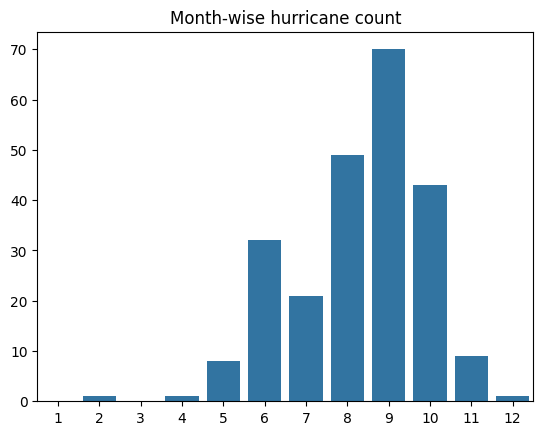

In [15]:
sns.barplot(data=hurricanes_each_month, x=hurricanes_each_month.keys(), y=hurricanes_each_month.values())
plt.title("Month-wise hurricane count")
plt.show()

In [16]:
hurricanes_each_month.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

### Arranging dates in chronological order
Using the `.sorted()` function on a list

### Turning dates into strings

By default converted into ISO 8601 format (i.e. YYYY-MM-DD). `datetime obj.isoformat()`

For own custom format use `strftime`. Example syntax is:  `datetime obj.strftime("%Y")`

In [17]:
fl_hd[0].strftime("%Y")

'1950'

In [18]:
# Customizing the date format as per our requirements
fl_hd[0].strftime("%Y-%B-%d")

'1950-August-31'

In [19]:
# We can also insert texts
fl_hd[0].strftime("Year value for this record is %Y")


'Year value for this record is 1950'

In this exercise, you will format the earliest date in the florida_hurricane_dates list in two ways so you can decide which one you want to use: 

either the ISO standard OR  the typical US style.

In [20]:
# Determining earliest format from the list
earliest = min(fl_hd)

iso = earliest.isoformat()
us = earliest.strftime("%m/%d/%Y")

print(f"ISO format is:{iso} (YYYY-MM-DD) ; US format is: {us} (MM/DD/YYYY)")

ISO format is:1950-08-31 (YYYY-MM-DD) ; US format is: 08/31/1950 (MM/DD/YYYY)


### Exercise 

Attempting other formats from the exercise Questions:

In [21]:
# Print the date in the format 'MONTH (YYYY)'
print(earliest.strftime("%B (%Y)"))

August (1950)


In [22]:
# Print the date in the format 'YYYY-DDD'; Astronomers usually use the 'day number' out of 366 
# instead of the month and date to avoid ambiguities between languages.
print(earliest.strftime("%Y-%j"))

1950-243


# Dates & Times
The date component of the datetime object carries same format for dates as seen earlier, but now also contains `hours:mins:sec` . Micro-seconds can also be added


In [23]:
from datetime import datetime

In [24]:
dt = datetime(2017, 10,1,14,30,30)
print(dt)

2017-10-01 14:30:30


In [25]:
# Various methods can be applied to the dt object
dt_new = dt.replace(minute=55)
print(dt_new)

2017-10-01 14:55:30


In [26]:
print(dt)

print(dt.replace(minute=59, second=0))

2017-10-01 14:30:30
2017-10-01 14:59:00


### Q: Print the results in ISO format.
Create a datetime for October 1, 2017 at 15:26:26.

In [27]:
newdt = datetime(2017, 10, 1, 15,26,26)
print(newdt.isoformat())

2017-10-01T15:26:26


## Working with the `capital-onebike` dataset

In [28]:
onebike = pd.read_csv('./capital-onebike.csv')
onebike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Start date            290 non-null    object
 1   End date              290 non-null    object
 2   Start station number  290 non-null    int64 
 3   Start station         290 non-null    object
 4   End station number    290 non-null    int64 
 5   End station           290 non-null    object
 6   Bike number           290 non-null    object
 7   Member type           290 non-null    object
dtypes: int64(2), object(6)
memory usage: 18.3+ KB


In [29]:
onebike.head()

,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,2017-10-01 15:23:25,2017-10-01 15:26:26,31038,Glebe Rd & 11th St N,31036,George Mason Dr & Wilson Blvd,W20529,Member
1,2017-10-01 15:42:57,2017-10-01 17:49:59,31036,George Mason Dr & Wilson Blvd,31036,George Mason Dr & Wilson Blvd,W20529,Casual
2,2017-10-02 06:37:10,2017-10-02 06:42:53,31036,George Mason Dr & Wilson Blvd,31037,Ballston Metro / N Stuart & 9th St N,W20529,Member
3,2017-10-02 08:56:45,2017-10-02 09:18:03,31037,Ballston Metro / N Stuart & 9th St N,31295,Potomac & M St NW,W20529,Member
4,2017-10-02 18:23:48,2017-10-02 18:45:05,31295,Potomac & M St NW,31230,Metro Center / 12th & G St NW,W20529,Member


In [30]:
onebike['Bike number'].value_counts()

Bike number
W20529    290
Name: count, dtype: int64

In [31]:
adict= [{'start': datetime(2017, 10, 1, 15, 23, 25),
  'end': datetime(2017, 10, 1, 15, 26, 26)},
 {'start': datetime(2017, 10, 1, 15, 42, 57),
  'end': datetime(2017, 10, 1, 17, 49, 59)},
 {'start': datetime(2017, 10, 2, 6, 37, 10),
  'end': datetime(2017, 10, 2, 6, 42, 53)},
 {'start': datetime(2017, 10, 2, 8, 56, 45),
  'end': datetime(2017, 10, 2, 9, 18, 3)},
 {'start': datetime(2017, 10, 2, 18, 23, 48),
  'end': datetime(2017, 10, 2, 18, 45, 5)},]

In [32]:
for trip in adict:
    if trip['start'].hour < 12:
        print(f"{trip['start']} was in morning")


2017-10-02 06:37:10 was in morning
2017-10-02 08:56:45 was in morning


# Parsing datetimes

Using `datetime.strptime("__")

In [33]:
dt = datetime(2017, 10, 2, 9, 18, 3)
print(dt)

2017-10-02 09:18:03


In [34]:
print(dt.isoformat())

2017-10-02T09:18:03


In [108]:
strdt = datetime.strptime("2015/01/15 14:30:33", "%Y/%m/%d %H:%M:%S")
print(strdt)
print(type(strdt))


2015-01-15 14:30:33
<class 'datetime.datetime'>


# Working with durations

Difference between two datetime objects

In [36]:
start = adict[1]['start']
end = adict[1]['end']

print(f"{start} ; {end}")

2017-10-01 15:42:57 ; 2017-10-01 17:49:59


In [37]:
round((end - start).total_seconds()/3600,2)

2.12

## Using `timedelta` module

Adding a `timedelta` object to a datetime object to modify it to a time that is later or earlier than the object.



In [38]:
from datetime import timedelta

In [39]:
add_delta = timedelta(days=2)
print(type(add_delta))

<class 'datetime.timedelta'>


In [40]:
sample_dt = adict[2]['start']
print(sample_dt)
print(type(sample_dt))

2017-10-02 06:37:10
<class 'datetime.datetime'>


The new date:

In [41]:
print(sample_dt + add_delta)

2017-10-04 06:37:10


In [42]:
# Adding timedelta directly
print(sample_dt + timedelta(days=365))

2018-10-02 06:37:10


In [43]:
# Adding a timedelta value of past time ; eg past one month
print(sample_dt + timedelta(days=-30))

2017-09-02 06:37:10


# Working with UTC Offsets
Handling UTC time in Python primarily involves the datetime module, especially with the timezone object for creating timezone-aware datetime objects.

In [44]:
from datetime import datetime, timedelta, timezone

In [45]:
# US ET timezone
ET = timezone(timedelta(hours=-5))
# Timzone-aware datetime - 4th October 30mins past midnight
dt = datetime(2025,10,4, 00, 30,00)

print(dt)

2025-10-04 00:30:00


In [46]:
# Creating a timezone object
IST = timezone(timedelta(hours=5, minutes=30))
# Converting sample dt to IST timezone
print(dt.astimezone(IST))

2025-10-04 00:30:00+05:30


print(dt.replace)

In [47]:
# Changing the clock altogether to UTC offset
print(dt.replace(tzinfo=timezone.utc))

2025-10-04 00:30:00+00:00


In [48]:
print(dt.astimezone(timezone.utc))

2025-10-03 19:00:00+00:00


In [49]:
print(dt.replace(tzinfo=IST))

2025-10-04 00:30:00+05:30


> `.replace` will change just the timezone of the datetome object , while `.astimezone` will completely shift it to the new timezone.

## Timezone database

In [50]:
from dateutil import tz

In [51]:
# Getting tz for IST
ist = tz.gettz('Asia/Kolkata')

In [52]:
# Using offset obtained from the 
print(dt.replace(tzinfo=ist))

2025-10-04 00:30:00+05:30


### Dealing with Daylight savings time
We'll check how we're switching from local time to daylight saving time

**1. Setting DST manually:** Using the `timedelta` & `.replace` functions

In [53]:
# Setting Daylight saving time manually
EDT = timezone(timedelta(hours = -5))
EST = timezone(timedelta(hours = -4))

In [54]:
print(dt)
print(dt.replace(tzinfo=EDT))
print(dt.replace(tzinfo=EST))

2025-10-04 00:30:00
2025-10-04 00:30:00-05:00
2025-10-04 00:30:00-04:00


**2. Using :** Using the `tz` package from `dateutil`

In [55]:
eastern_time = tz.gettz('America/New_York')
ahead_time = datetime(2025,3,12, 1,59,59, tzinfo=eastern_time)
print(ahead_time)

2025-03-12 01:59:59-04:00


>This conversion is required to gain clarity on the actual time elapsed when switching the timezones.<br>
>NOTE that converting to UTC reveals the actual time elapsed


Switching from DST to local time

In [56]:
est = tz.gettz('US/Eastern')
first_1am = datetime(2017,11,5,1,0,0, tzinfo=est)
print(first_1am)

2017-11-05 01:00:00-04:00


In [57]:
# Using the datetime_ambiguous to tell whether a datetime is ambigious
# i.e. an overlap of some sort exists & needs to be solved for actual time value
tz.datetime_ambiguous(first_1am)

True

The True output means that this time is occurring at two UTC moments in this timezone.

Now creating second datetime with `tz.enfold` method applied.

In [58]:
second_1am = datetime(2017,11,5,1,0,0, tzinfo=est)
second_1am = tz.enfold(second_1am)
print(second_1am)

2017-11-05 01:00:00-05:00


Comparing the two timestamps

In [59]:
diff = second_1am.astimezone(tz.UTC) - first_1am.astimezone(tz.UTC)

In [60]:
print(diff)

1:00:00


In [61]:
diff

datetime.timedelta(seconds=3600)

# Handling Dates & Times in pandas

Working with the `capital-one` bike dataset - handling the date time columns to derive meaningful insights with regards to ride duration, seasonal trends etc. 

Observe that the 'Start date' & 'End date' columns are not in required format at the time of loading.

In [62]:
# Parsing the required columns into datetime dtypes
bikes = pd.read_csv('capital-onebike.csv', parse_dates=['Start date', 'End date'])

In [63]:
bikes.head()

,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,2017-10-01 15:23:25,2017-10-01 15:26:26,31038,Glebe Rd & 11th St N,31036,George Mason Dr & Wilson Blvd,W20529,Member
1,2017-10-01 15:42:57,2017-10-01 17:49:59,31036,George Mason Dr & Wilson Blvd,31036,George Mason Dr & Wilson Blvd,W20529,Casual
2,2017-10-02 06:37:10,2017-10-02 06:42:53,31036,George Mason Dr & Wilson Blvd,31037,Ballston Metro / N Stuart & 9th St N,W20529,Member
3,2017-10-02 08:56:45,2017-10-02 09:18:03,31037,Ballston Metro / N Stuart & 9th St N,31295,Potomac & M St NW,W20529,Member
4,2017-10-02 18:23:48,2017-10-02 18:45:05,31295,Potomac & M St NW,31230,Metro Center / 12th & G St NW,W20529,Member


In [64]:
print(bikes.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Start date            290 non-null    datetime64[ns]
 1   End date              290 non-null    datetime64[ns]
 2   Start station number  290 non-null    int64         
 3   Start station         290 non-null    object        
 4   End station number    290 non-null    int64         
 5   End station           290 non-null    object        
 6   Bike number           290 non-null    object        
 7   Member type           290 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 18.3+ KB
None


In [65]:
bikes['Start date'][1]

Timestamp('2017-10-01 15:42:57')

### Calculating ride duration
Creating a 'Duration' column to calculate ride durations 

In [66]:
bikes['Duration'] = bikes['End date'] - bikes['Start date']
bikes.head()

,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,Duration
0,2017-10-01 15:23:25,2017-10-01 15:26:26,31038,Glebe Rd & 11th St N,31036,George Mason Dr & Wilson Blvd,W20529,Member,0 days 00:03:01
1,2017-10-01 15:42:57,2017-10-01 17:49:59,31036,George Mason Dr & Wilson Blvd,31036,George Mason Dr & Wilson Blvd,W20529,Casual,0 days 02:07:02
2,2017-10-02 06:37:10,2017-10-02 06:42:53,31036,George Mason Dr & Wilson Blvd,31037,Ballston Metro / N Stuart & 9th St N,W20529,Member,0 days 00:05:43
3,2017-10-02 08:56:45,2017-10-02 09:18:03,31037,Ballston Metro / N Stuart & 9th St N,31295,Potomac & M St NW,W20529,Member,0 days 00:21:18
4,2017-10-02 18:23:48,2017-10-02 18:45:05,31295,Potomac & M St NW,31230,Metro Center / 12th & G St NW,W20529,Member,0 days 00:21:17


The 'duration' column appropriately has `timedelta` dtype

In [67]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   Start date            290 non-null    datetime64[ns] 
 1   End date              290 non-null    datetime64[ns] 
 2   Start station number  290 non-null    int64          
 3   Start station         290 non-null    object         
 4   End station number    290 non-null    int64          
 5   End station           290 non-null    object         
 6   Bike number           290 non-null    object         
 7   Member type           290 non-null    object         
 8   Duration              290 non-null    timedelta64[ns]
dtypes: datetime64[ns](2), int64(2), object(4), timedelta64[ns](1)
memory usage: 20.5+ KB


In [68]:
bikes['Start date'].dt.day_name()

0        Sunday
1        Sunday
2        Monday
3        Monday
4        Monday
         ...   
285      Friday
286      Friday
287      Friday
288    Saturday
289    Saturday
Name: Start date, Length: 290, dtype: object

## Summarizing datetime data in pandas
- Most statistical summarizing funcs will work on datetime dtypes

In [69]:
print(bikes['Start date'].mean())
print(bikes['Start date'].max())
print(bikes['Start date'].min())

2017-11-10 01:44:46.713792768
2017-12-30 15:09:03
2017-10-01 15:23:25


In [70]:
# Calculating total duration that the datast covers
bikes['Start date'].max() - bikes['Start date'].min()

Timedelta('89 days 23:45:38')

In [71]:
# Calculating % bike travel time
bikes['Duration'].sum() / (bikes['Start date'].max() - bikes['Start date'].min())

0.04397220988231977

> SO we conclude that bike was out of docking station about 4% of the total duration

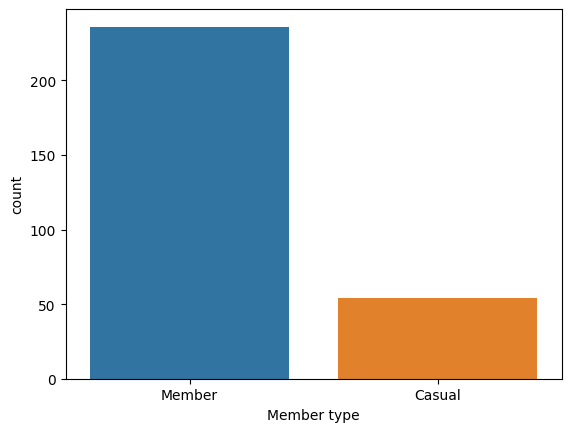

In [72]:
sns.countplot(data=bikes, x=bikes['Member type'], hue=bikes['Member type'])
plt.show()

In [73]:
# % share of Member type in the dataset
bikes['Member type'].value_counts() / len(bikes)

Member type
Member    0.813793
Casual    0.186207
Name: count, dtype: float64

>We observe that ~80% of riders in the dataset are Member users ;while ~20% are Casual users

In [74]:
# Grouping aggregations for datetime objects in minutes
bikes.groupby('Member type')['Duration'].mean().dt.total_seconds()/60


Member type
Casual    33.244444
Member    16.537994
Name: Duration, dtype: float64

>Note that above values are in minutes. Rides from casual members seem to be twice as longer than members

## Using `resample` to a groupby:
`resample()` is a powerful method used for changing the frequency of time series data. It is primarily applied to Series or DataFrames with a DatetimeIndex, PeriodIndex, or TimedeltaIndex.

The core idea is to group data points into new time intervals and then apply an aggregation function to each group.

**Frequency Conversion:** `resample()` allows you to convert your time series data to a different frequency. This can involve:<br>
**Downsampling**: Aggregating data from a higher frequency to a lower frequency (e.g., daily data to weekly or monthly).<br>
**Upsampling**: Increasing the frequency of the data (e.g., monthly data to daily), which often involves filling in missing values or using interpolation.

In [75]:
# Calculating average ride duration by month
# bikes.groupby('Member type')['Duration'].mean().dt.total_seconds()/60
bikes.resample(rule='ME', on='Start date')['Duration'].mean().dt.total_seconds()/60

Start date
2017-10-31    31.440895
2017-11-30    14.236246
2017-12-31    10.585021
Freq: ME, Name: Duration, dtype: float64

<Axes: xlabel='Start date'>

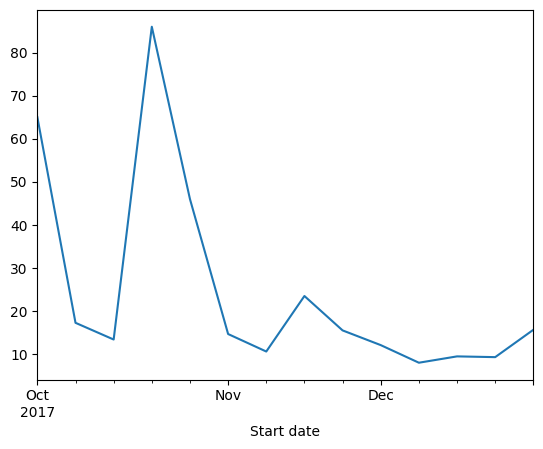

In [76]:
# Plotting week-sie average ridership
# Use Duration minutes  (calculated) for better granularity
(bikes.resample(rule='W', on='Start date')['Duration'].mean().dt.total_seconds()/60).plot()

>We observe that in one of the weeks in mid-Oct has higher ride duration. This most likely is a maintanence trip.


<Axes: xlabel='Start date'>

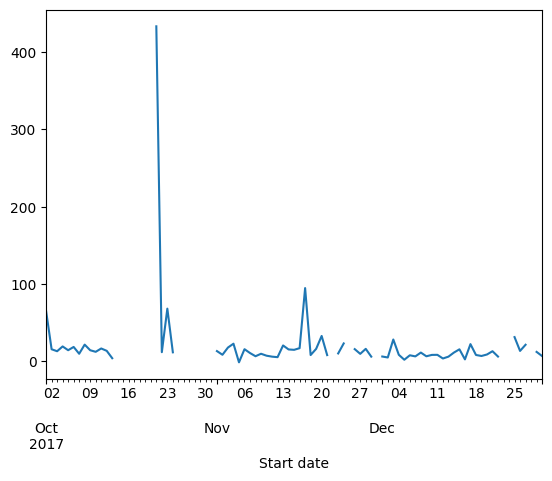

In [77]:
# Increasing granularity to day-level
(bikes.resample(rule='D', on='Start date')['Duration'].mean().dt.total_seconds()/60).plot()

In [78]:
# Find the no. of 'joyrides'(long bike rides before being returned back to the same dock)
# Create joyrides
joyrides = (bikes['Start station'] == bikes['End station'])

# Total number of joyrides
print("{} bikes were joyrides".format(joyrides.sum()))

# Median of all bikes
print(f"The median duration overall was {bikes['Duration'].dt.total_seconds().median()} seconds")

# Median of joyrides
print(f"The median duration for joyrides was {bikes[joyrides]['Duration'].dt.total_seconds().median()} seconds")

6 bikes were joyrides
The median duration overall was 660.0 seconds
The median duration for joyrides was 2642.5 seconds


### Q: Analyzing effct of weather & holidays on bike rides

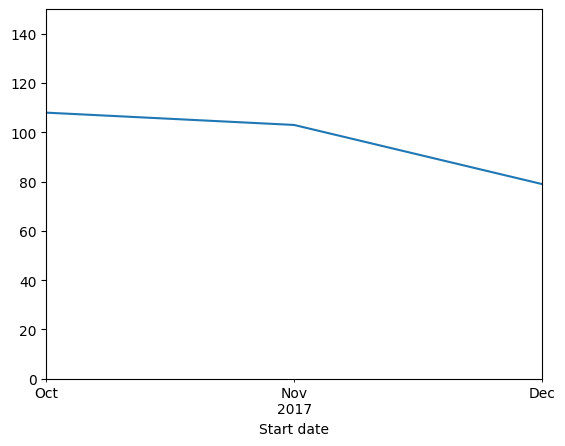

In [79]:
# Resample rides to monthly, take the size, plot the results
bikes.resample('ME', on = 'Start date')\
  .size()\
  .plot(ylim = [0, 150])

# Show the results
plt.show()

the pattern is clearer at the monthly level: there were fewer rides in November, and then fewer still in December, possibly because the temperature got colder.
_______

**Q:** Do members and casual riders drop off at the same rate over October to December, or does one drop off faster than the other?


In [80]:
# Resample rides to be monthly on the basis of Start date
monthly_rides = bikes.resample('ME',on='Start date')['Member type']

# Take the ratio of the .value_counts() over the total number of rides
print(monthly_rides.value_counts() / monthly_rides.size())

Start date  Member type
2017-10-31  Member         0.768519
            Casual         0.231481
2017-11-30  Member         0.825243
            Casual         0.174757
2017-12-31  Member         0.860759
            Casual         0.139241
dtype: float64


In [81]:
monthly_rides.size()

Start date
2017-10-31    108
2017-11-30    103
2017-12-31     79
Freq: ME, Name: Member type, dtype: int64

In [82]:
monthly_rides

### Combining `groupby()` and `resample()`
`.resample()` groups rows by some time or date information, `.groupby()` groups rows based on the values in one or more columns.

**Q:** how long was the median ride by month, and by Membership type?

In [85]:
# Group rides by member type, and resample to the month
grouped = bikes.groupby('Member type').resample('ME', on='Start date')

# Print the median duration for each group
print(grouped['Duration'].median().dt.total_seconds())

Member type  Start date
Casual       2017-10-31    1636.0
             2017-11-30    1159.5
             2017-12-31     850.0
Member       2017-10-31     671.0
             2017-11-30     655.0
             2017-12-31     387.5
Name: Duration, dtype: float64


## Additional datetime methods in pandas

Datetime objects by default are timezone naive, it needs to be made a timezone-aware object, meaning they're not tied to any absolute time with a UTC offset.

In below example, durations value shows to be negative (which shouldn't be the case). This mean there are some datetime records with daylight savings shift, so there needs to be a standardization of time values to UTC

In [87]:
bikes['Duration'].dt.total_seconds().min()

np.float64(-3346.0)

Applying `tz_localize` to limited records, we are able to convert this limited selection to UTC

In [89]:
bikes['Start date'].head().dt.tz_localize('America/New_York')

0   2017-10-01 15:23:25-04:00
1   2017-10-01 15:42:57-04:00
2   2017-10-02 06:37:10-04:00
3   2017-10-02 08:56:45-04:00
4   2017-10-02 18:23:48-04:00
Name: Start date, dtype: datetime64[ns, America/New_York]

However trying to convert the entire column results in error.

This must be resolved using the `ambigious` argument set to 'NaT' thar will handle the daylight saving issue

In [93]:
# bikes['Start date'].dt.tz_localize('America/New_York')

bikes['Start date'] = bikes['Start date'].dt.tz_localize('America/New_York', ambiguous='NaT')
bikes['End date'] = bikes['End date'].dt.tz_localize('America/New_York', ambiguous='NaT')
bikes.head()

,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,Duration
0,2017-10-01 15:23:25-04:00,2017-10-01 15:26:26-04:00,31038,Glebe Rd & 11th St N,31036,George Mason Dr & Wilson Blvd,W20529,Member,0 days 00:03:01
1,2017-10-01 15:42:57-04:00,2017-10-01 17:49:59-04:00,31036,George Mason Dr & Wilson Blvd,31036,George Mason Dr & Wilson Blvd,W20529,Casual,0 days 02:07:02
2,2017-10-02 06:37:10-04:00,2017-10-02 06:42:53-04:00,31036,George Mason Dr & Wilson Blvd,31037,Ballston Metro / N Stuart & 9th St N,W20529,Member,0 days 00:05:43
3,2017-10-02 08:56:45-04:00,2017-10-02 09:18:03-04:00,31037,Ballston Metro / N Stuart & 9th St N,31295,Potomac & M St NW,W20529,Member,0 days 00:21:18
4,2017-10-02 18:23:48-04:00,2017-10-02 18:45:05-04:00,31295,Potomac & M St NW,31230,Metro Center / 12th & G St NW,W20529,Member,0 days 00:21:17


Re-calculating 'duration' column to adress the negative values. Now the min value turns out to be valid.

In [94]:
bikes['Duration'] = bikes['End date'] - bikes['Start date']
bikes['Duration'].dt.total_seconds().min()

np.float64(116.0)

In [97]:
# Identifying the record with the datetime issue
bikes[bikes['Duration'].isnull()]

,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,Duration
129,NaT,NaT,31615,6th & H St NE,31627,3rd & M St NE,W20529,Member,NaT


### Using datetime accessors using `dt.`

In [102]:
# Accessing year
bikes['Start date'].head().dt.year

bikes['Start date'].head().dt.day_name()

0    Sunday
1    Sunday
2    Monday
3    Monday
4    Monday
Name: Start date, dtype: object

In [104]:
bikes.tail()

,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,Duration
285,2017-12-29 14:32:55-05:00,2017-12-29 14:43:46-05:00,31242,18th St & Pennsylvania Ave NW,31265,5th St & Massachusetts Ave NW,W20529,Member,0 days 00:10:51
286,2017-12-29 15:08:26-05:00,2017-12-29 15:18:51-05:00,31265,5th St & Massachusetts Ave NW,31613,Eastern Market Metro / Pennsylvania Ave & 7th ...,W20529,Casual,0 days 00:10:25
287,2017-12-29 20:33:34-05:00,2017-12-29 20:38:13-05:00,31613,Eastern Market Metro / Pennsylvania Ave & 7th ...,31618,4th & East Capitol St NE,W20529,Member,0 days 00:04:39
288,2017-12-30 13:51:03-05:00,2017-12-30 13:54:33-05:00,31618,4th & East Capitol St NE,31610,Eastern Market / 7th & North Carolina Ave SE,W20529,Member,0 days 00:03:30
289,2017-12-30 15:09:03-05:00,2017-12-30 15:19:13-05:00,31610,Eastern Market / 7th & North Carolina Ave SE,31272,Washington & Independence Ave SW/HHS,W20529,Member,0 days 00:10:10


In [106]:
bikes['Time since'] = bikes['Start date'] - (bikes['End date'].shift(1))

# Move from a timedelta to a number of seconds, which is easier to work with
bikes['Time since'] = bikes['Time since'].dt.total_seconds()

# Resample to the month
monthly = bikes.resample('ME',on='Start date')

# Print the average hours between bikes each month
print(monthly['Time since'].mean()/(60*60))

Start date
2017-10-31 00:00:00-04:00    5.519242
2017-11-30 00:00:00-05:00    7.256474
2017-12-31 00:00:00-05:00    9.202380
Name: Time since, dtype: float64


In [107]:
bikes.head()

,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,Duration,Time since
0,2017-10-01 15:23:25-04:00,2017-10-01 15:26:26-04:00,31038,Glebe Rd & 11th St N,31036,George Mason Dr & Wilson Blvd,W20529,Member,0 days 00:03:01,NaN
1,2017-10-01 15:42:57-04:00,2017-10-01 17:49:59-04:00,31036,George Mason Dr & Wilson Blvd,31036,George Mason Dr & Wilson Blvd,W20529,Casual,0 days 02:07:02,991.0
2,2017-10-02 06:37:10-04:00,2017-10-02 06:42:53-04:00,31036,George Mason Dr & Wilson Blvd,31037,Ballston Metro / N Stuart & 9th St N,W20529,Member,0 days 00:05:43,46031.0
3,2017-10-02 08:56:45-04:00,2017-10-02 09:18:03-04:00,31037,Ballston Metro / N Stuart & 9th St N,31295,Potomac & M St NW,W20529,Member,0 days 00:21:18,8032.0
4,2017-10-02 18:23:48-04:00,2017-10-02 18:45:05-04:00,31295,Potomac & M St NW,31230,Metro Center / 12th & G St NW,W20529,Member,0 days 00:21:17,32745.0
